- Nama: Risky Kurniawan
- NIM: 2009106050
- Kelas: A2 20
- POSTTEST 6

# **Import Library & Dataset**

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [73]:
data = pd.read_csv('Wholesale customers data.csv')
data.head(15)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


# **Subset Data dan Scaling Data**

Menggunakan StandardScaler

In [74]:
X = data.iloc[:,2:8].values

In [75]:

ss = StandardScaler()
x_scaled = ss.fit_transform(X)

# **K-Means**

## **Menentukan Jumlah Cluster (Elbow Method)**

Untuk menentukan jumlah cluster paling optimal

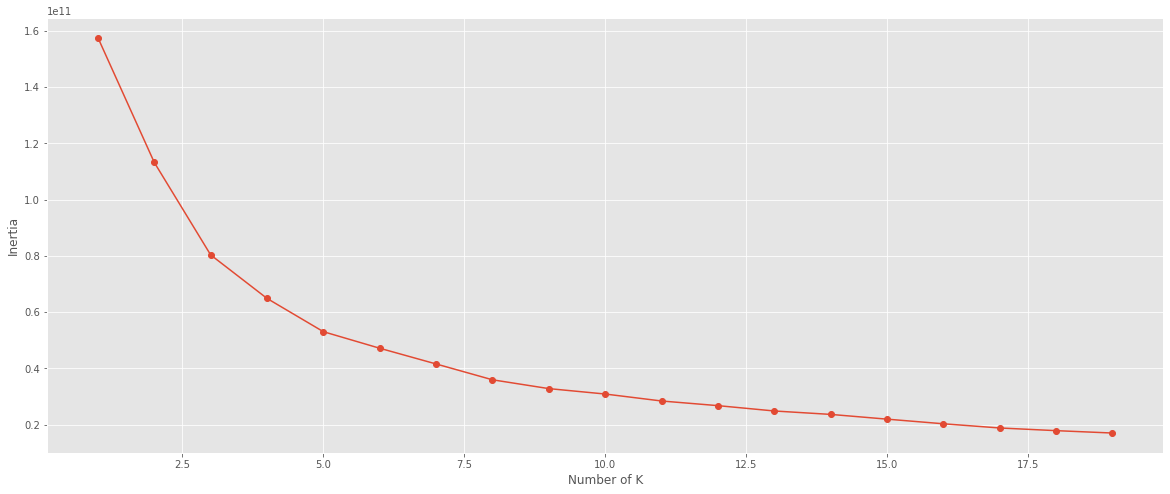

In [86]:

results =[]
for i in range(1,20):
    kmeans2 = KMeans(n_clusters = i,random_state=123)
    kmeans2.fit(X)
    results.append(kmeans2.inertia_)

plt.figure(figsize = (20,8))

plt.plot(range(1,20),results, '-o')

plt.xlabel('Number of K')
plt.ylabel('Inertia')
plt.show()

Terlihat bahwa cluster 5 sampai 7 adalah jumlah cluster yang optimal, disini saya menggunakan 5 cluster

## **Model K-Means**

In [77]:
model = KMeans(n_clusters=5)

In [88]:
# Lakukan fit terhadap model berdasarkan data x_scaled
model.fit(x_scaled)
# Model menentukan label dari setiap sample
labels = model.labels_
labels

array([2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 4, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 4, 0, 0, 2, 2, 1, 0, 2, 2, 4, 0, 2, 2, 2, 4, 2, 0, 2, 4,
       2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 4, 4, 1,
       2, 1, 2, 2, 4, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       1, 2, 2, 2, 2, 1, 0, 3, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 4, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 4, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,

## **Menampilkan Centroid point yang telah dibuat**

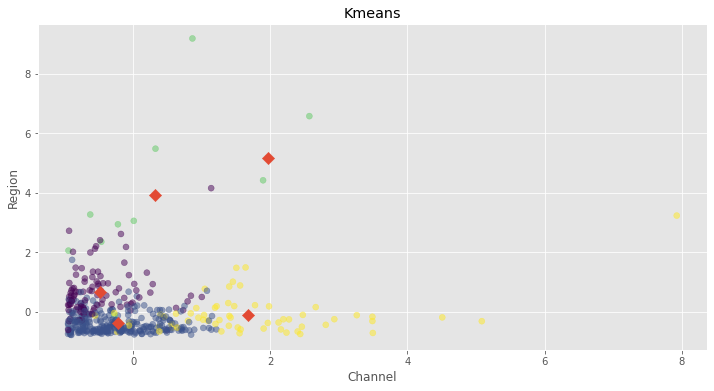

In [79]:
# menggunakan style ggplot
plt.style.use('ggplot')

plt.figure(figsize = (12,6))
xs = x_scaled[:,0]
ys = x_scaled[:,1]

centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(xs, ys, alpha=0.5, c=labels)
plt.title('Kmeans')

# Centroid point
plt.scatter(centroids_x,centroids_y,
            marker="D",s=75,label="Centroid")

plt.xlabel("Channel")
plt.ylabel("Region")
plt.show()

In [80]:
# Buat objek dari AgglomerativeClustering dengan jumlah cluster : 5
hc_cluster = AgglomerativeClustering(n_clusters=5)

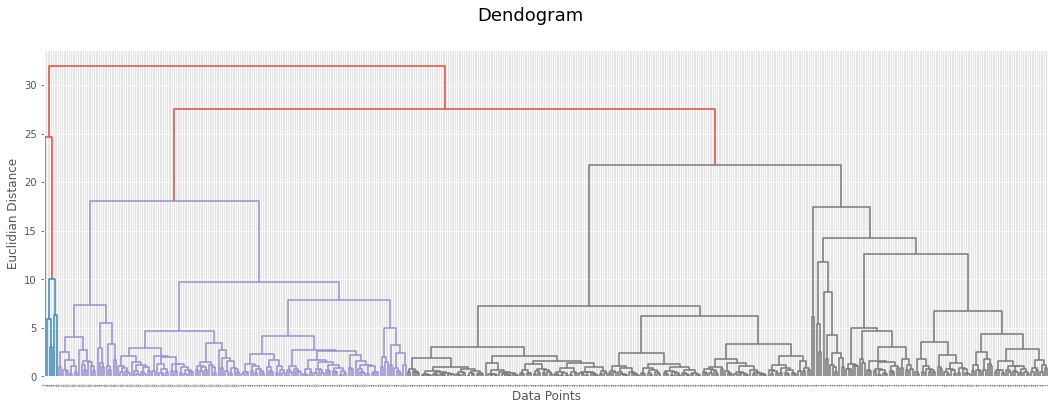

In [90]:
merg = linkage(x_scaled,method="ward")

plt.figure(figsize=(18,6))

dendrogram(
    merg, 
    leaf_rotation=90,
    labels=labels,
    leaf_font_size=4
    )

plt.xlabel("Data Points")
plt.ylabel("Euclidian Distance")

plt.suptitle("Dendogram",fontsize=18)
plt.show()